# Task 3: Correlation of MOS values between crowdsourcing and lab setup

In [1]:
# install.packages('dplyr')      # processing 
# install.packages('gdata')      # file reading
# install.packages('reshape2')   # smart matrix manipulation
#install.packages('tidyverse')    # includes ggplot for charts

In [2]:
# include libraries
library(dplyr)
library(readxl)
library(reshape2)
library(tidyverse)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.0.0     v forcats 0.4.0
v readr   1.3.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Read in crowdsourcing data

In [3]:
#load CS-per condition
speech_quality_crowdsourcing <- read_excel("datasets/DB04_speech_quality_crowdsourcing_dataset.xlsx", sheet = 3)
speech_quality_crowdsourcing$cond = substr(speech_quality_crowdsourcing$files,6,8)

In [4]:
# remove NA's and merge data
p <- select(speech_quality_crowdsourcing, starts_with("P"), cond)
crowd <- melt(p, id.vars=c('cond'))
crowd <- na.omit(crowd)

In [5]:
# compute MOS values for CS-per condition sheet
cs_per_cond <- crowd %>% 
group_by(cond) %>% 
summarise(MOS = mean(value, na.rm = TRUE)) %>%
arrange(cond) %>%
rename(MOS_CS = MOS, Condition = cond) 

cs_per_cond 

Condition,MOS_CS
c01,4.836449
c02,1.541284
c03,4.351852
c04,2.783410
c05,3.537037
c06,4.623256
c07,3.665094
c08,3.933962
c09,3.117371
c10,4.518182


# Read in lab data

In [6]:
#load Lab-per condition
speech_quality_lab <- read_excel("datasets/DB04_speech_quality_crowdsourcing_dataset.xlsx", sheet = 6)

In [7]:
lab_per_cond <- speech_quality_lab %>% select(condition, MOS) %>% arrange(condition) %>% rename(MOS_Lab = MOS, Condition = condition)
lab_per_cond

Condition,MOS_Lab
c01,4.4948
c02,1.3750
c03,3.8333
c04,2.3906
c05,3.3281
c06,4.2708
c07,3.7500
c08,3.6302
c09,2.8281
c10,3.8958


# Merge MOS values for crowdsourcing and lab setup

In [8]:
MOS_data <- merge(cs_per_cond, lab_per_cond)
MOS_data

Condition,MOS_CS,MOS_Lab
c01,4.836449,4.4948
c02,1.541284,1.3750
c03,4.351852,3.8333
c04,2.783410,2.3906
c05,3.537037,3.3281
c06,4.623256,4.2708
c07,3.665094,3.7500
c08,3.933962,3.6302
c09,3.117371,2.8281
c10,4.518182,3.8958


# Both MOS = continuous variables, seemingly linearly related: Pearson correlation applicable and best choice for this data set

In [9]:
corr_matrix_pearson <- cor(MOS_data[-c(1)], method="pearson")

paste0('Pearson correlation coefficient (r) for Crowdsourcing and Lab MOS = ', round(corr_matrix_pearson[[2]],5))

[1] "Pearson correlation coefficient (r) for Crowdsourcing and Lab MOS = 0.9796"

# However: continuous data can be down-graded to ordinal data with information loss, but then: also less precise Spearman and Kendall correlation possible

In [10]:
corr_matrix_kendall <- cor(MOS_data[-c(1)], method="kendall")

paste0('Kendall correlation coefficient (tao) for Crowdsourcing and Lab MOS = ', round(corr_matrix_kendall[[2]],5))


corr_matrix_spearman <- cor(MOS_data[-c(1)], method="spearman")

paste0('Spearman correlation coefficient (rho) for Crowdsourcing and Lab MOS = ', round(corr_matrix_spearman[[2]],5))

[1] "Kendall correlation coefficient (tao) for Crowdsourcing and Lab MOS = 0.87262"

[1] "Spearman correlation coefficient (rho) for Crowdsourcing and Lab MOS = 0.97131"

# Visualization of MOS data in scatter plot

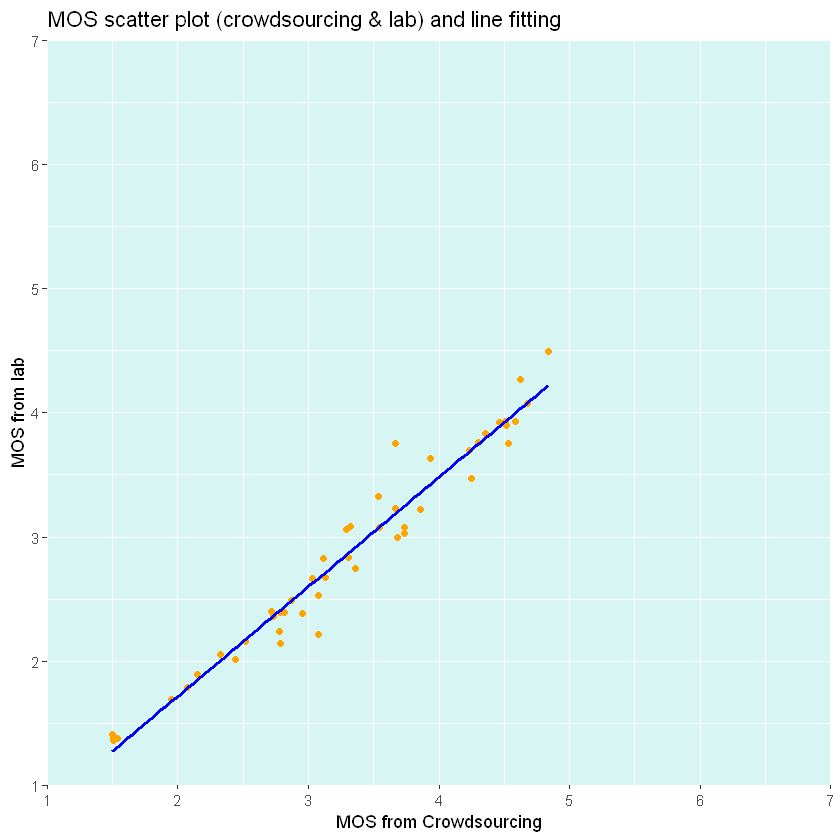

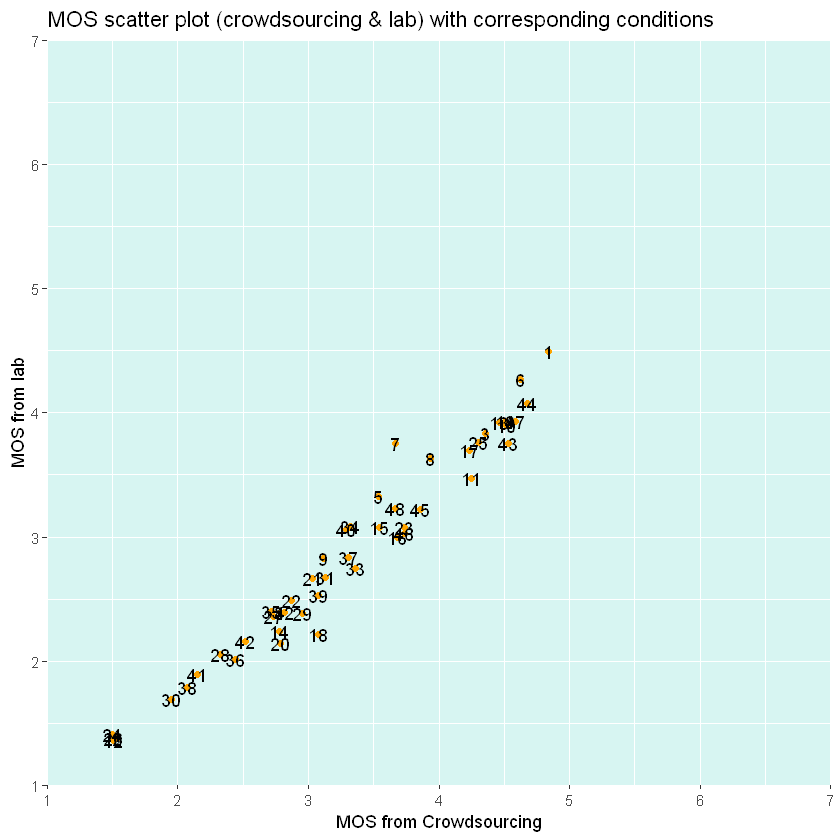

In [11]:
plot <- ggplot(MOS_data[-c(1)], aes(x=MOS_CS, y = MOS_Lab)) + 
        geom_point(color='orange') + 
        coord_cartesian( ylim=c(1,7), xlim=c(1,7)) + 
        scale_y_continuous(breaks=seq(1,7,1), expand = c(0, 0)) + 
        scale_x_continuous(breaks=seq(1,7,1), expand = c(0, 0)) + 
        labs(x = "MOS from Crowdsourcing", y = "MOS from lab") + 
        theme( panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
                      strip.text = element_text(size=15, colour='darkred'))

plot + geom_smooth(method=lm, se=FALSE, color='blue') + ggtitle("MOS scatter plot (crowdsourcing & lab) and line fitting")

plot + geom_text(label=rownames(MOS_data), color='black') + ggtitle("MOS scatter plot (crowdsourcing & lab) with corresponding conditions")